<a href="https://colab.research.google.com/github/Vas1l1sa/SWW_ML_project_AI-aptamers/blob/main/01_%D0%9E%D1%87%D0%B8%D1%81%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SWW/исходный датасет аптамеры SWW.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()


,aptamer,smiles,pKd
0,CCTGGGGGAGTATTGCGGAGGAAGG,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,6.798603
1,AaAgcgggcggttgtatagcggaa,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,6.198596
2,GTCTCTGTGTGCGCCAGAGAACACTGGGGCAGATATGGGCCAGCAC...,NCCc1ccc(Oc(O)c1,7.397940
3,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,6.262569
4,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.970616


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   aptamer  584 non-null    object 
 1   smiles   584 non-null    object 
 2   pKd      584 non-null    float64
dtypes: float64(1), object(2)
memory usage: 13.8+ KB


In [ ]:
df.describe()

,pKd
count,584.000000
mean,5.646264
std,4.178779
min,-15.196354
25%,4.994703
50%,6.004365
75%,6.207889
max,25.937984


**Посмотрим отдельно на столбец с аптамерами**

In [ ]:
df['aptamer']

,aptamer
0,CCTGGGGGAGTATTGCGGAGGAAGG
1,AaAgcgggcggttgtatagcggaa
2,GTCTCTGTGTGCGCCAGAGAACACTGGGGCAGATATGGGCCAGCAC...
3,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...
4,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...
...,...
579,GCTGTGTGACTCCTGCAAACTACTGGTGTTCCTTGCCCTGTTTCAA...
580,ZGCTGTGTGACTCCTGCAAACTACTGGTGTTCCTTGCCCTGTTTCA...
581,ATACCAGCTTATTCAATTATTCAATTCGAGGCGGGTGGGTGGGTTG...
582,CGTTAGACG


 Фильтруем строки в столбце 'aptamer', оставляя только те, которые содержат только допустимые символы - нуклеотиды A, C, T, G, U (заглавные или строчные буквы) без пробелов, '-', '_' и т.п.. Если в строке нуклеотиды записаны строчными буквами, то все строчные буквы должны замениться на заглавные.

 Также убираем все строки, в которых одновременно содержатся нуклеотиды T и U, т.к. с точки зрения биологии это невозможно (Т входит в состав ДНК, а U - РНК)

In [ ]:
# используем регулярные выражения для проверки строк
import re

def correct_aptamer(aptamer):

    #проверяем, содержит ли строка только ACTGU (немодифицированные ДНК/РНК в любом регистре)
    valid_pattern1 = re.compile(r'^[ACTGUactgu]+$')

    if valid_pattern1.match(str(aptamer)):
      return str(aptamer).upper()

    #проверяем, содержит ли строка только ACTG (ДНК) или ACUG (РНК)
    valid_pattern2 = re.compile(r'^[ACTG]+$|^[ACUG]+$')

    if valid_pattern2.match(str(aptamer)):
      return str(aptamer)

    return None

df['aptamer'] = df['aptamer'].apply(correct_aptamer)
df = df.dropna(subset=['aptamer'])
df

,aptamer,smiles,pKd
0,CCTGGGGGAGTATTGCGGAGGAAGG,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,6.798603
1,AAAGCGGGCGGTTGTATAGCGGAA,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,6.198596
2,GTCTCTGTGTGCGCCAGAGAACACTGGGGCAGATATGGGCCAGCAC...,NCCc1ccc(Oc(O)c1,7.397940
3,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,6.262569
4,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.970616
...,...,...,...
578,TCCAGCACTCCACGCATAACGAATTGTGCTCAATGCGCCCCTGCAG...,C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)(Cl)Cl)Cl,6.384787
579,GCTGTGTGACTCCTGCAAACTACTGGTGTTCCTTGCCCTGTTTCAA...,C[C@@H]1C[C@@H]([C@@H]2[C@H](C[C@H]([C@@](O2)(...,7.248336
581,ATACCAGCTTATTCAATTATTCAATTCGAGGCGGGTGGGTGGGTTG...,C1[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=NC4=C(N=CN=...,3.000000
582,CGTTAGACG,CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C,7.609065


**Посмотрим отдельно на столбец с молекулами, записанными в виде SMILES**

Проверим и при необходимости очистим колонку "smiles". Для этого напишем функцию, которая прогоняет значения по специализированной библиотеке и удаляет из датафрейма те строки, где SMILES-формулы некорректны.

In [ ]:
df['smiles']

,smiles
0,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...
1,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...
2,NCCc1ccc(Oc(O)c1
3,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O
4,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
...,...
578,C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)(Cl)Cl)Cl
579,C[C@@H]1C[C@@H]([C@@H]2[C@H](C[C@H]([C@@](O2)(...
581,C1[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=NC4=C(N=CN=...
582,CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C


Проверим, нет ли NaN-значений в колонке 'smiles', иначе будущая функция не будет работать корректно

In [ ]:
df['smiles'].isna().sum()

0

In [ ]:
!pip install rdkit
from rdkit import Chem

def is_valid_smiles(smiles):

  #пытаемся обратно создать объект молекулы из SMILES
  mol = Chem.MolFromSmiles(smiles)

  if mol is not None:
    return smiles
  else:
    return None

df['smiles'] = df['smiles'].apply(is_valid_smiles)
df = df.dropna(subset=['smiles'])
df



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 40.5 MB/s eta 0:00:00


[16:41:06] SMILES Parse Error: extra open parentheses while parsing: NCCc1ccc(Oc(O)c1
[16:41:06] SMILES Parse Error: check for mistakes around position 9:
[16:41:06] NCCc1ccc(Oc(O)c1
[16:41:06] ~~~~~~~~^
[16:41:06] SMILES Parse Error: Failed parsing SMILES 'NCCc1ccc(Oc(O)c1' for input: 'NCCc1ccc(Oc(O)c1'
[16:41:06] SMILES Parse Error: syntax error while parsing: C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(VO)OP(=O)(O)OP(=O)(O)O)O)O)N
[16:41:06] SMILES Parse Error: check for mistakes around position 42:
[16:41:06] )C3C(C(C(O3)COP(=O)(VO)OP(=O)(O)OP(=O)(O)
[16:41:06] ~~~~~~~~~~~~~~~~~~~~^
[16:41:06] SMILES Parse Error: Failed parsing SMILES 'C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(VO)OP(=O)(O)OP(=O)(O)O)O)O)N' for input: 'C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(VO)OP(=O)(O)OP(=O)(O)O)O)O)N'
[16:41:06] SMILES Parse Error: syntax error while parsing: C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=OV)(O)OP(=O)(O)OP(=O)(O)O)O)O)N
[16:41:06] SMILES Parse Error: check for mistakes around position 40:
[1

,aptamer,smiles,pKd
0,CCTGGGGGAGTATTGCGGAGGAAGG,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,6.798603
1,AAAGCGGGCGGTTGTATAGCGGAA,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,6.198596
3,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,6.262569
4,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.970616
5,TAGGGAAGAGAAGGACATATGATGTCGCGCCAGCCTTCTGCGTTGA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.478862
...,...,...,...
578,TCCAGCACTCCACGCATAACGAATTGTGCTCAATGCGCCCCTGCAG...,C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)(Cl)Cl)Cl,6.384787
579,GCTGTGTGACTCCTGCAAACTACTGGTGTTCCTTGCCCTGTTTCAA...,C[C@@H]1C[C@@H]([C@@H]2[C@H](C[C@H]([C@@](O2)(...,7.248336
581,ATACCAGCTTATTCAATTATTCAATTCGAGGCGGGTGGGTGGGTTG...,C1[C@@H]2[C@H]([C@H]([C@@H](O2)N3C=NC4=C(N=CN=...,3.000000
582,CGTTAGACG,CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C,7.609065


Построим барплот для колонки pKD

Text(0, 0.5, 'pKD')

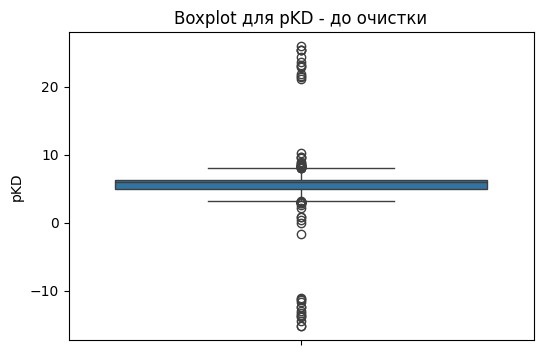

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['pKd'])

plt.title('Boxplot для pKD - до очистки')
plt.ylabel('pKD')

**Теперь удалим выбросы из столбца 'pKD', если они там есть**.

Границы для выбросов определяем с помощью квартилей: 1.5 * IQR (межквартильный размах) от Q1 и Q3.

In [ ]:
def filter_outliers(df, column):

    #вычисленим Q1 (25-й перцентиль) и Q3 (75-й перцентиль)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    #вычисленим межквартильного размаха (IQR)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

df_filtered = filter_outliers(df, 'pKd')
df_filtered


,aptamer,smiles,pKd
0,CCTGGGGGAGTATTGCGGAGGAAGG,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,6.798603
1,AAAGCGGGCGGTTGTATAGCGGAA,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,6.198596
3,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,6.262569
4,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.970616
5,TAGGGAAGAGAAGGACATATGATGTCGCGCCAGCCTTCTGCGTTGA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.478862
...,...,...,...
576,ATACCAGCTTATTCAATTCAGGAAGACAACTCCGACTAGAATTGAT...,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H]...,7.259637
578,TCCAGCACTCCACGCATAACGAATTGTGCTCAATGCGCCCCTGCAG...,C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)(Cl)Cl)Cl,6.384787
579,GCTGTGTGACTCCTGCAAACTACTGGTGTTCCTTGCCCTGTTTCAA...,C[C@@H]1C[C@@H]([C@@H]2[C@H](C[C@H]([C@@](O2)(...,7.248336
582,CGTTAGACG,CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C,7.609065


**Построим боксплоты "до" и "после" удаления выбросов по колонке pKd**

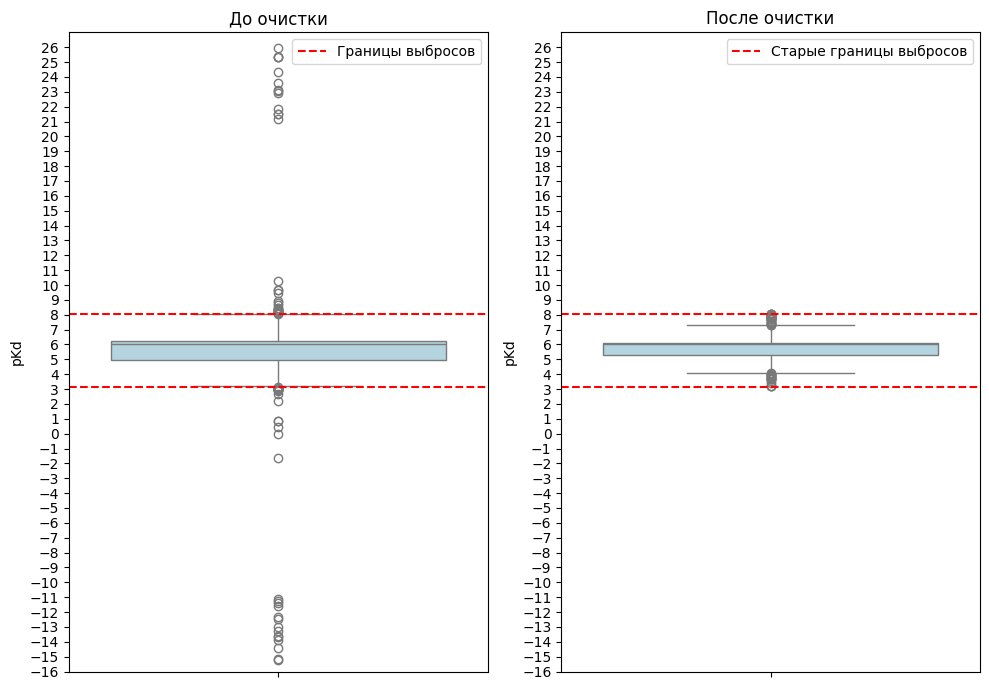

In [ ]:
# Вычисление границ выбросов (по исходным данным)
Q1 = df['pKd'].quantile(0.25)
Q3 = df['pKd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



# Определяем общий масштаб осей
y_min = round(min(df['pKd'].min(), df_filtered['pKd'].min()) - 1)
y_max = round(max(df['pKd'].max(), df_filtered['pKd'].max()) + 1)

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

yticks = np.arange(y_min, y_max, 1)

# Боксплот до очистки
sns.boxplot(y=df['pKd'], color='lightblue', ax=axes[0])
axes[0].axhline(lower_bound, linestyle="--", color="red", label="Границы выбросов")
axes[0].axhline(upper_bound, linestyle="--", color="red")
axes[0].set_ylim(y_min, y_max)  # Фиксируем масштаб
axes[0].set_yticks(yticks)  # Добавляем больше делений
axes[0].set_title("До очистки")
axes[0].legend()  # Добавляем легенду

# Боксплот после очистки (с фиксированными границами выбросов)
sns.boxplot(y=df_filtered['pKd'], color='lightblue', ax=axes[1])
axes[1].axhline(lower_bound, linestyle="--", color="red", label="Старые границы выбросов")
axes[1].axhline(upper_bound, linestyle="--", color="red")
axes[1].set_ylim(y_min, y_max)  # Фиксируем масштаб
axes[1].set_yticks(yticks)  # Добавляем больше делений
axes[1].set_title("После очистки")
axes[1].legend()  # Добавляем легенду



plt.tight_layout()
plt.show()


**Сбросим и переустановим индексы DataFrame после всех удалений строк, которые мы сделали**

In [ ]:
df_filtered = df_filtered.reset_index(drop=True)
df_filtered

,aptamer,smiles,pKd
0,CCTGGGGGAGTATTGCGGAGGAAGG,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,6.798603
1,AAAGCGGGCGGTTGTATAGCGGAA,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,6.198596
2,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,6.262569
3,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.970616
4,TAGGGAAGAGAAGGACATATGATGTCGCGCCAGCCTTCTGCGTTGA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.478862
...,...,...,...
443,ATACCAGCTTATTCAATTCAGGAAGACAACTCCGACTAGAATTGAT...,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H]...,7.259637
444,TCCAGCACTCCACGCATAACGAATTGTGCTCAATGCGCCCCTGCAG...,C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)(Cl)Cl)Cl,6.384787
445,GCTGTGTGACTCCTGCAAACTACTGGTGTTCCTTGCCCTGTTTCAA...,C[C@@H]1C[C@@H]([C@@H]2[C@H](C[C@H]([C@@](O2)(...,7.248336
446,CGTTAGACG,CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C,7.609065


**Проверим, не осталось ли нулевых значений в датафрейме**

In [ ]:
df_filtered.isna().sum()

,0
aptamer,0
smiles,0
pKd,0


Как мы видим, нулевых значений нет



**Удалим дубликаты строк, елси они есть**

In [ ]:
df_filtered = df_filtered.drop_duplicates(subset=['aptamer', 'smiles'], keep='first')
df_filtered

,aptamer,smiles,pKd
0,CCTGGGGGAGTATTGCGGAGGAAGG,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,6.798603
1,AAAGCGGGCGGTTGTATAGCGGAA,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,6.198596
2,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,6.262569
3,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.970616
4,TAGGGAAGAGAAGGACATATGATGTCGCGCCAGCCTTCTGCGTTGA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.478862
...,...,...,...
442,ATACCAGCTTATTCAATTCTACCAGCTTTGAGGCTCGATCCAGCTT...,C[C@H]1CCCC(=O)CCC/C=C/C2=C(C(=CC(=C2)O)O)C(=O)O1,7.818156
443,ATACCAGCTTATTCAATTCAGGAAGACAACTCCGACTAGAATTGAT...,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H]...,7.259637
445,GCTGTGTGACTCCTGCAAACTACTGGTGTTCCTTGCCCTGTTTCAA...,C[C@@H]1C[C@@H]([C@@H]2[C@H](C[C@H]([C@@](O2)(...,7.248336
446,CGTTAGACG,CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C,7.609065


**Построим гитограмму для получившихся данных по столбцу pKd**

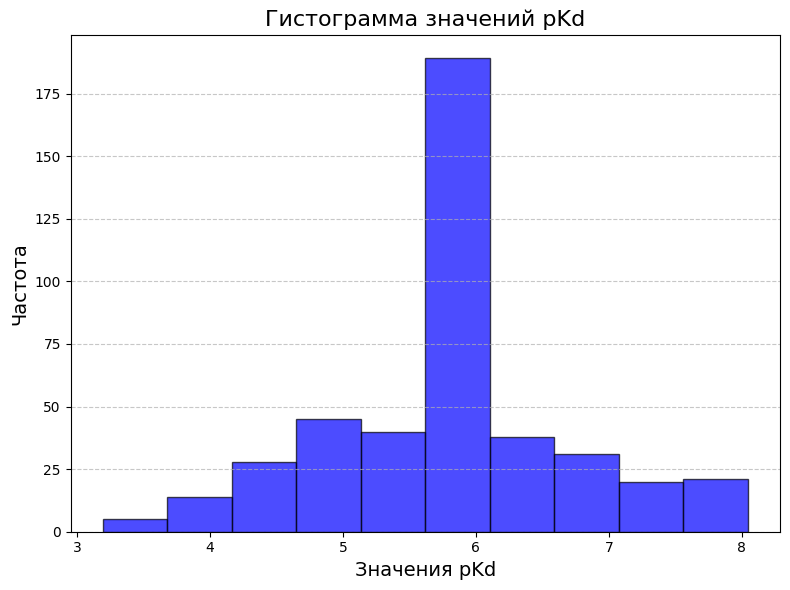

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['pKd'], bins=10, color='blue', edgecolor='black', alpha=0.7)

plt.title('Гистограмма значений pKd', fontsize=16)
plt.xlabel('Значения pKd', fontsize=14)
plt.ylabel('Частота', fontsize=14)


plt.grid(axis='y', linestyle='--', alpha=0.7)  # Сетка только по оси Y
plt.tight_layout()
plt.show()

**Сохраним получившийся очищенный датасет**

In [ ]:
df_filtered.to_csv('/content/drive/MyDrive/SWW/аптамеры_df_filtered.csv', index=False)

In [ ]:
len(df_filtered)

431

In [ ]:
df_filtered.describe()

,pKd
count,431.000000
mean,5.854729
std,0.929971
min,3.193820
25%,5.297833
50%,6.004365
75%,6.110729
max,8.045757


In [ ]:
correct = pd.read_csv('/content/drive/MyDrive/SWW/изначально чистый датасет аптамеры.csv')
correct = correct.drop(['Unnamed: 0'], axis=1)
len(correct)

584

In [ ]:
correct.describe()

,pKd
count,584.000000
mean,5.689100
std,1.401444
min,-1.653213
25%,5.016604
50%,6.004365
75%,6.113145
max,10.301030


In [ ]:
import pandas as pd

def compare_datasets(df1, df2):

    # Найти строки, которые есть в df2, но нет в df1
    only_in_df2 = df1.merge(df2, how='outer', indicator=True).query('_merge == "right_only"').drop('_merge', axis=1)

    return only_in_df2

differences_df = compare_datasets(df, correct)
differences_df

,aptamer,smiles,pKd
77,ACCTGGGGGAGTATTGCGGAGGAAGGT,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CO)O)O)N,4.086186
95,AGCAGCACAGAGGTCAGATGATGCGGGTATATGGTGCGAGAAAACA...,C1=CC(=CC=C1[C@H]([C@@H](CO)NC(=O)C(Cl)Cl)O)[N...,5.657577
108,AGCAGCACAGAGGTCAGATGTGGCGTAGTATGCGCTCCGAAATAGC...,COC1=C2C3=C(C(=O)CC3)C(=O)OC2=C4[C@@H]5C=CO[C@...,6.593460
110,AGCAGCACAGAGGTCAGTTCCAAGTCGTACGACACAGGGTAATCCT...,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...,4.292430
120,AGGAATTCACGTCTCACTGGATTCACGCACGCCAAGGACTGCACTT...,CCC3OC(=O)C(C)C(OC1CC(C)(OC)C(O)C(C)O1)C(C)C(O...,6.698970
...,...,...,...
623,TGAGGCGGGTGGGTGGGTTGAATACGCTGATCACCCCATCGGAGAA...,C(CO)N,6.004365
625,TGAGGCGGGTGGGTGGGTTGAATACGCTGATTACCCCACCGGAGAA...,C(CO)N,6.004365
631,TGATTGAACACAATTCTGCAGACTCTGAGCAAGGGTATGGGGTTTT...,CCC1=C(C2=CC3=NC(=CC4=NC(=CC5=C(C(=C(N5C)C=C1N...,6.004365
632,TGGGGGGAGTATTGCGGAGGAA,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,6.004365


In [ ]:
differences_df.isna().sum()

,0
aptamer,0
smiles,0
pKd,0


In [ ]:
differences_df['aptamer'] = differences_df['aptamer'].apply(correct_aptamer)
df['smiles'] = df['smiles'].apply(is_valid_smiles)
differences_df = differences_df.dropna(subset=['aptamer'])
differences_df = differences_df.dropna(subset=['smiles'])
differences_df = filter_outliers(differences_df, 'pKd')
differences_df = differences_df.drop_duplicates(subset=['aptamer', 'smiles'], keep='first')
differences_df

,aptamer,smiles,pKd
77,ACCTGGGGGAGTATTGCGGAGGAAGGT,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CO)O)O)N,4.086186
95,AGCAGCACAGAGGTCAGATGATGCGGGTATATGGTGCGAGAAAACA...,C1=CC(=CC=C1[C@H]([C@@H](CO)NC(=O)C(Cl)Cl)O)[N...,5.657577
108,AGCAGCACAGAGGTCAGATGTGGCGTAGTATGCGCTCCGAAATAGC...,COC1=C2C3=C(C(=O)CC3)C(=O)OC2=C4[C@@H]5C=CO[C@...,6.593460
110,AGCAGCACAGAGGTCAGTTCCAAGTCGTACGACACAGGGTAATCCT...,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2O)CCC4=C3...,4.292430
120,AGGAATTCACGTCTCACTGGATTCACGCACGCCAAGGACTGCACTT...,CCC3OC(=O)C(C)C(OC1CC(C)(OC)C(O)C(C)O1)C(C)C(O...,6.698970
...,...,...,...
623,TGAGGCGGGTGGGTGGGTTGAATACGCTGATCACCCCATCGGAGAA...,C(CO)N,6.004365
625,TGAGGCGGGTGGGTGGGTTGAATACGCTGATTACCCCACCGGAGAA...,C(CO)N,6.004365
631,TGATTGAACACAATTCTGCAGACTCTGAGCAAGGGTATGGGGTTTT...,CCC1=C(C2=CC3=NC(=CC4=NC(=CC5=C(C(=C(N5C)C=C1N...,6.004365
632,TGGGGGGAGTATTGCGGAGGAA,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,6.004365
